## Homework 1 ##

Perform the quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case (without Monod). Check the analytical result with simulations. If you add Monod, numerically how the solutions change?

In [17]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt


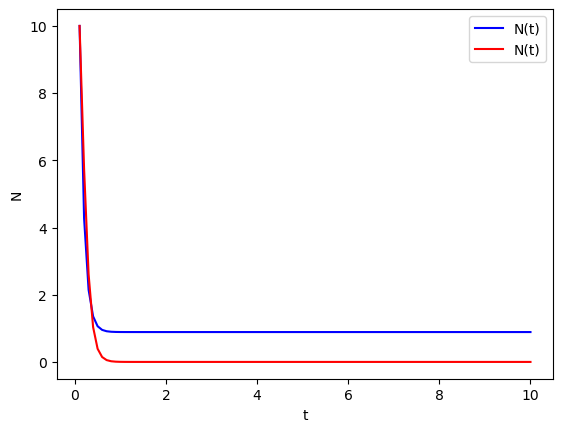

In [39]:
## PARAMETERS
# g: gamma -> yield coeffiient; (0,inf)
# d: death rate; [0,1]
# s: supply rate; (0,inf)
# c: efficiency of the uptake rate; [0,1]
# N0: initial population; [0,inf)

## VARIABLES
# N: population
# t: time

g = 0.8
d = 10
s = 10
c = 0.9
mu = 0.8
K = 10

# Without Monod:
def eq(N,t):
    return (((g * s) / (c * N)) - d) * N

# With Monod: 
def monod(N,t):
    return (g * mu * ((s * N) / (K + (s / (c * N)))) - d) * N

# Set the time span 
t_s = np.linspace(0.1, 10, 101) # in seconds

# Set initial conditions
N0 = 10  # N0 = 10

# Solve
#sol = solve_ivp(eq, t_s, N0, method='RK45')
sol = odeint(eq,N0,t_s)
sol_m = odeint(monod,N0,t_s)

# Plot the results
plt.plot(t_s, sol, label='N(t)', color='b')
plt.plot(t_s, sol_m, label='N(t)', color='r')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.show()